In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
house_data = pd.read_csv('kc_house_data.csv')
house_data.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


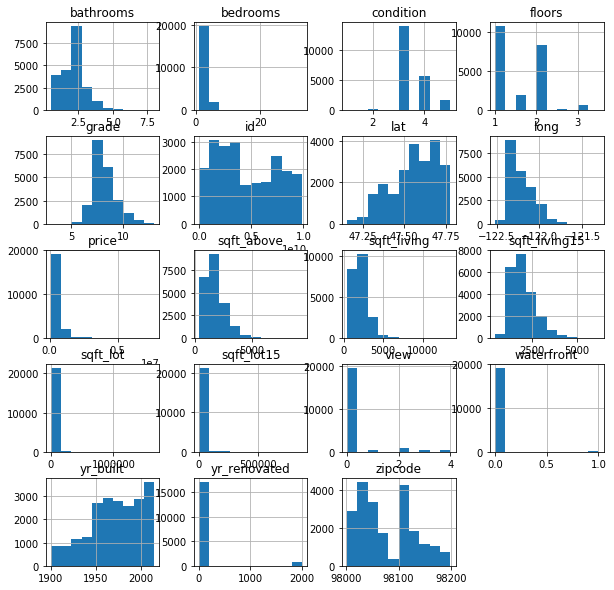

In [3]:
_ = house_data.hist(figsize=(10,10))

In [4]:
house_data['waterfront'].unique()

array([nan,  0.,  1.])

In [5]:
house_data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [6]:
house_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [38]:
prices = np.array(house_data['price'])
prices_90th = np.percentile(prices, 90)
prices_90th

887000.0

In [39]:
house_data_90th = house_data[house_data.price <= prices_90th]
house_data_90th.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19438 entries, 0 to 21596
Data columns (total 21 columns):
id               19438 non-null int64
date             19438 non-null object
price            19438 non-null float64
bedrooms         19438 non-null int64
bathrooms        19438 non-null float64
sqft_living      19438 non-null int64
sqft_lot         19438 non-null int64
floors           19438 non-null float64
waterfront       17286 non-null float64
view             19381 non-null float64
condition        19438 non-null int64
grade            19438 non-null int64
sqft_above       19438 non-null int64
sqft_basement    19438 non-null object
yr_built         19438 non-null int64
yr_renovated     15979 non-null float64
zipcode          19438 non-null int64
lat              19438 non-null float64
long             19438 non-null float64
sqft_living15    19438 non-null int64
sqft_lot15       19438 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.3+ MB


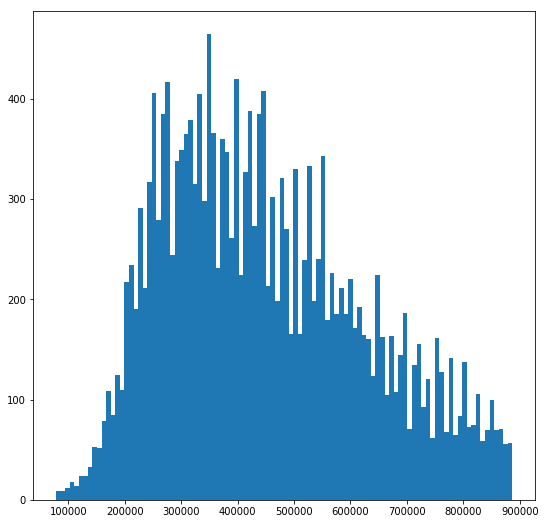

In [40]:
plt.figure(figsize=(9, 9))
_ = plt.hist(house_data_90th['price'], bins=100)

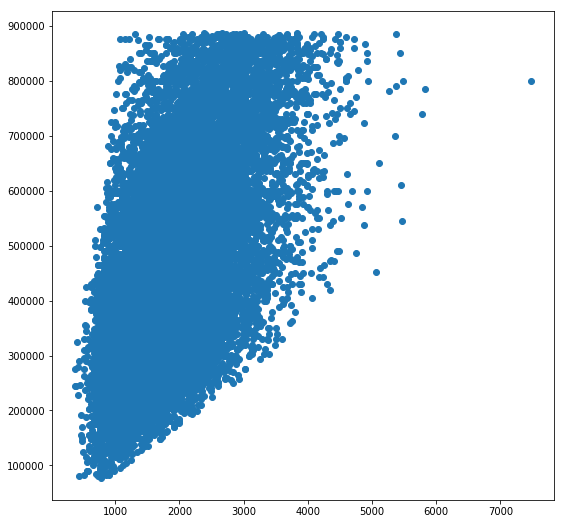

In [41]:
plt.figure(figsize=(9, 9))
_ = plt.scatter(house_data_90th['sqft_living'], house_data_90th['price'])

In [42]:
house_data_90th.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19438 entries, 0 to 21596
Data columns (total 21 columns):
id               19438 non-null int64
date             19438 non-null object
price            19438 non-null float64
bedrooms         19438 non-null int64
bathrooms        19438 non-null float64
sqft_living      19438 non-null int64
sqft_lot         19438 non-null int64
floors           19438 non-null float64
waterfront       17286 non-null float64
view             19381 non-null float64
condition        19438 non-null int64
grade            19438 non-null int64
sqft_above       19438 non-null int64
sqft_basement    19438 non-null object
yr_built         19438 non-null int64
yr_renovated     15979 non-null float64
zipcode          19438 non-null int64
lat              19438 non-null float64
long             19438 non-null float64
sqft_living15    19438 non-null int64
sqft_lot15       19438 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.3+ MB
